C:\Users\Cao Zhe\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


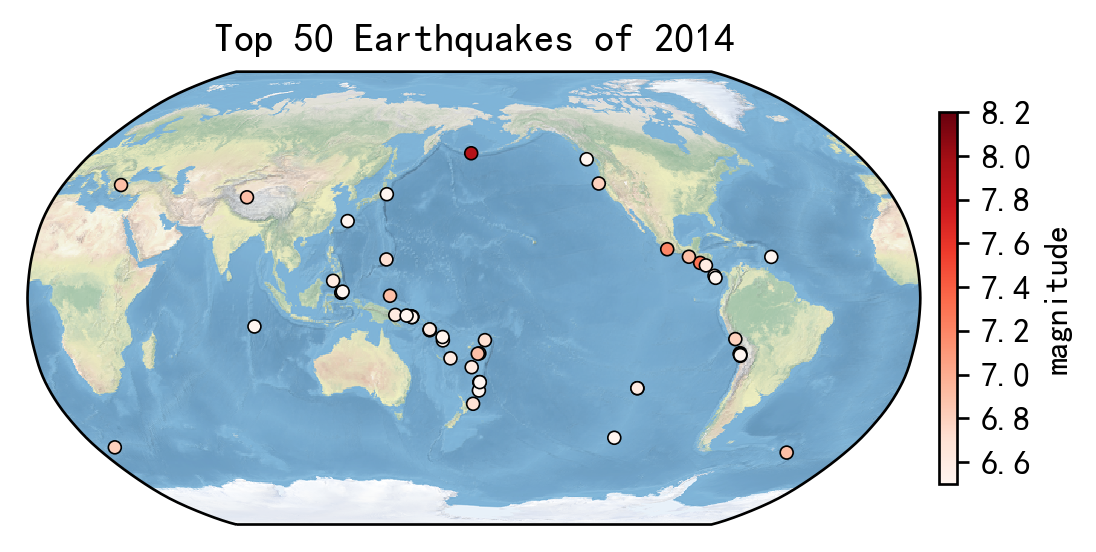

In [58]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline
Sig_Eqs = pd.read_csv('usgs_earthquakes.csv')
Eqs_location_mag = Sig_Eqs[['latitude','longitude','mag']]
Eqs_location_mag.sort_values(by = 'mag',axis =0,ascending=False,inplace=True)
Eqs_location_mag_top50 = Eqs_location_mag[:54] #选前50个，但是第51个到54个都是和第五十个一样mag为6.5,所以都算在前50了，否则图会比题目给的少几个点
Eqs_location_mag_top50
lat = Eqs_location_mag_top50['latitude'].values
lon = Eqs_location_mag_top50['longitude'].values
mag = Eqs_location_mag_top50['mag'].values
Eqs_location_mag_top50 = Eqs_location_mag_top50.reset_index(drop=True)
max_mag = Eqs_location_mag_top50['mag'][0]
min_mag = Eqs_location_mag_top50['mag'][53]
plt.figure(figsize=(5,5), dpi=240)
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.stock_img()
ax.scatter(lon,lat,c=mag ,transform=ccrs.PlateCarree(),vmin= min_mag, vmax= max_mag , cmap='Reds',
           marker='o',edgecolors='k',s=15, linewidths=0.5)
cb=ax.figure.colorbar(ax.collections[0],fraction=0.02, pad=0.02,label = 'magnitude') #显示colorbar
ax.set_title('Top 50 Earthquakes of 2014')
plt.show()


C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:297: 

Text(91.11,29.97,'中国')

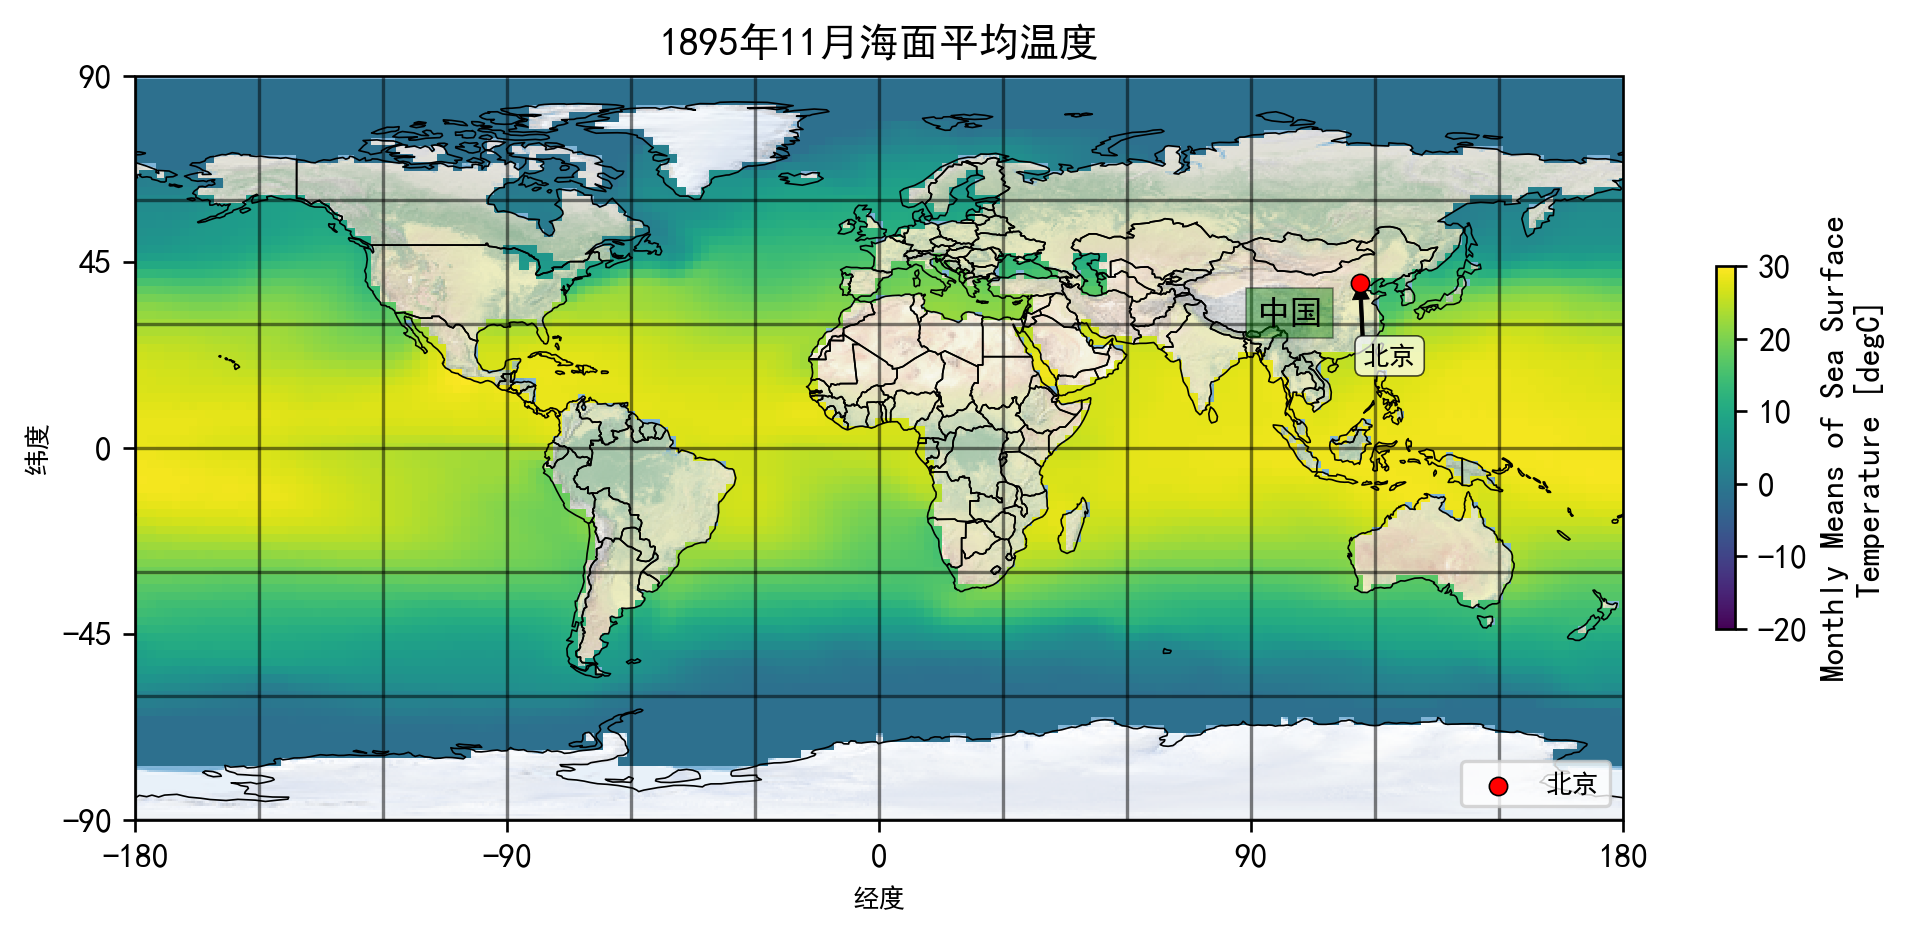

In [59]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False #解决中文及负号乱码问题

ds = xr.open_dataset('sst.mnmean.nc', engine="netcdf4")
surface_T = ds.sst.isel(time=502) #time用来控制时间，suface_t代表某年某月的全球海平面气温,本次取1895年11月的海平面月平均温度
# Create and define the size of a figure object 
plt.figure(figsize=(10,5), dpi=240)
# Create an axes with Orthographic projection style
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
# Plot the surface temperature 自动生成colorbar
surface_T.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=-20, vmax=30, cbar_kwargs={'shrink': 0.4})
ax.stock_img()
# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))
#x&y label and ticks
ax.tick_params(labelsize=10)
ax.set_xticks(np.linspace(-180, 180, 5), crs=ccrs.PlateCarree())
ax.set_yticks(np.linspace(-90, 90, 5), crs=ccrs.PlateCarree())
ax.set_xlabel('经度',fontsize=8)
ax.set_ylabel('纬度',fontsize=8)
#title
ax.set_title('1895年11月海面平均温度')
#gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5)
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,30))
gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))
#masks or feature
ax.scatter(116.3,39.9,s=30,c='r',marker='o',label='北京',zorder=5,edgecolors='k', linewidths=0.5)
#legend
ax.legend(loc=4,fontsize=8)
#annotations
ax.annotate('北京',xy=(116.3,39.9),xytext=(117,20),fontsize=8,
             arrowprops=dict(lw=0.3,width=1,headwidth=5,headlength=5,color='k'),
             bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black',lw=0.5 ,alpha=0.7))
#text box
ax.text(91.11,29.97,'中国',
         fontsize=10,bbox=dict(boxstyle='square,pad=0.3', fc='g', ec='black',lw=0.5 ,alpha=0.4))



C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
C:\Users\Cao Zhe\Anaconda3\lib\site-packages\cartopy\crs.py:297: 

Text(110,10,'南海')

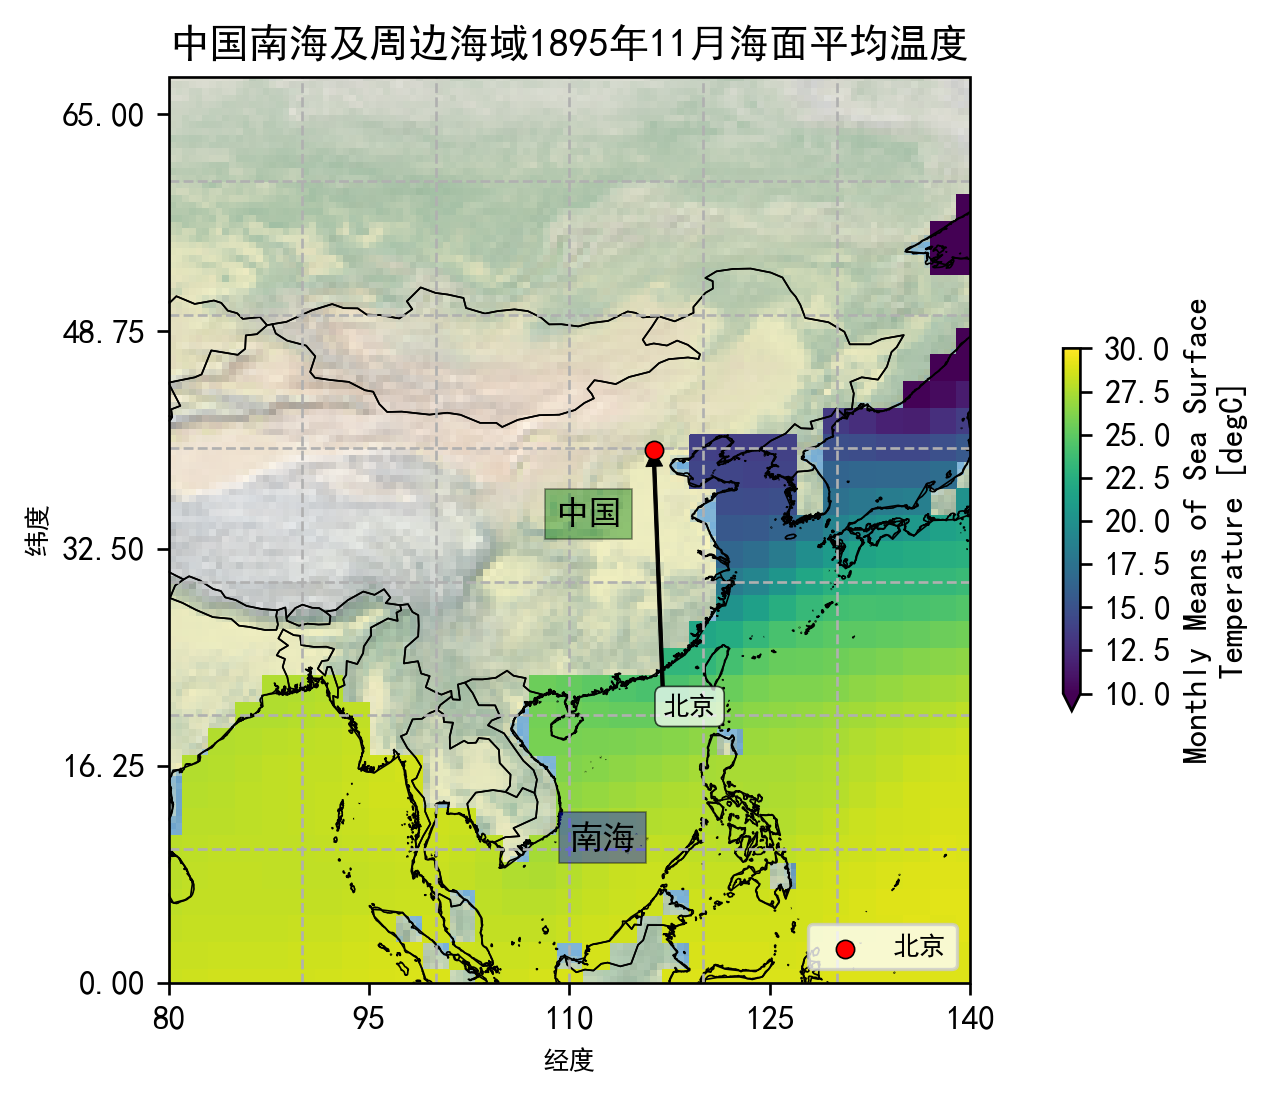

In [60]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False #解决中文及负号乱码问题

ds = xr.open_dataset('sst.mnmean.nc', engine="netcdf4")
surface_T = ds.sst.isel(time=502) #time用来控制时间，suface_t代表某年某月的全球海平面气温,本次取1895年11月的海平面月平均温度
# Create and define the size of a figure object 
plt.figure(figsize=(10,5), dpi=240)
# Set Orthographic projection style
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)

# Plot the surface temperature 自动生成colorbar
surface_T.plot(ax=ax, transform=ccrs.PlateCarree(),
         vmin=10, vmax=30, cbar_kwargs={'shrink': 0.4})
# Set a region and plot
ax.set_extent([80, 140, 0, 65])

# Add features to axes using methods
ax.coastlines(resolution='10m', linewidth=0.5)
ax.stock_img()
# Add border lines over countries 
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))
#x&y label and ticks
ax.tick_params(labelsize=10)
ax.set_xticks(np.linspace(80, 140, 5), crs=ccrs.PlateCarree())
ax.set_yticks(np.linspace(0, 65, 5), crs=ccrs.PlateCarree())
ax.set_xlabel('经度',fontsize=8)
ax.set_ylabel('纬度',fontsize=8)
#title
ax.set_title('中国南海及周边海域1895年11月海面平均温度')
#gridlines
ax.gridlines(linestyle='--')
#masks or feature
ax.scatter(116.3,39.9,s=30,c='r',marker='o',label='北京',zorder=5,edgecolors='k', linewidths=0.5)
#legend
ax.legend(loc=4,fontsize=8)
#annotations
ax.annotate('北京',xy=(116.3,39.9),xytext=(117,20),fontsize=8,
             arrowprops=dict(lw=0.3,width=1,headwidth=5,headlength=5,color='k'),
             bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black',lw=0.5 ,alpha=0.7))
#text box
ax.text(108.93,34.27,'中国',
         fontsize=10,bbox=dict(boxstyle='square,pad=0.3', fc='g', ec='black',lw=0.5 ,alpha=0.4))
ax.text(110,10,'南海',
         fontsize=10,bbox=dict(boxstyle='square,pad=0.3', fc='b', ec='black',lw=0.5 ,alpha=0.4))
